# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(json.dumps(city_weather, indent = 4))
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapa'a
Processing Record 2 of Set 1 | shubarshi
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | lemvig
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | sambalpur
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | lomas de santa anita
Processing Record 11 of Set 1 | egilsstadir
Processing Record 12 of Set 1 | tsengel
Processing Record 13 of Set 1 | dalandzadgad
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | zangguy
City not found. Skipping...
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | adamstown
Processing Record

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapa'a,22.0752,-159.3190,28.18,75,75,5.14,US,1684718280
1,shubarshi,48.5872,57.1869,13.69,52,22,4.84,KZ,1684718280
2,ushuaia,-54.8000,-68.3000,0.81,75,20,2.06,AR,1684718281
3,lemvig,56.5486,8.3102,14.00,79,100,4.12,DK,1684718281
4,port mathurin,-19.6833,63.4167,24.59,74,10,1.28,MU,1684718281


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,28.18,75,75,5.14,US,1684718280
1,shubarshi,48.5872,57.1869,13.69,52,22,4.84,KZ,1684718280
2,ushuaia,-54.8000,-68.3000,0.81,75,20,2.06,AR,1684718281
3,lemvig,56.5486,8.3102,14.00,79,100,4.12,DK,1684718281
4,port mathurin,-19.6833,63.4167,24.59,74,10,1.28,MU,1684718281


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

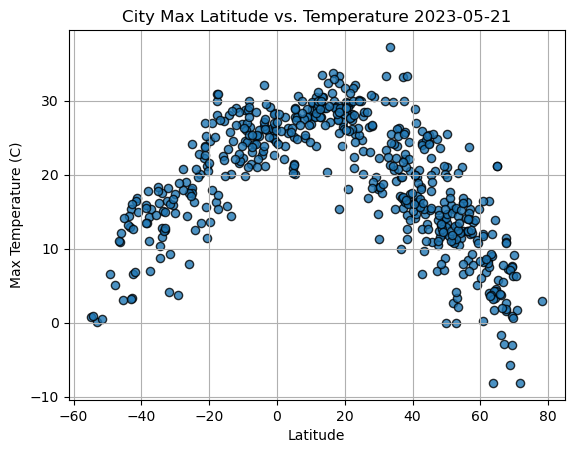

In [38]:
#import date format dependency & create variable for date in title
import datetime as dt
current_date = dt.datetime.today().strftime("%Y-%m-%d")

# Build scatter plot for latitude vs. temperature
lat_temp_scatter = city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", edgecolor="black", s=35, alpha=0.8)

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Max Latitude vs. Temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

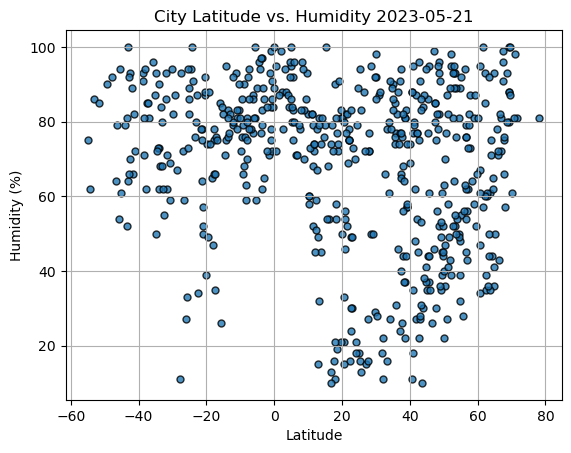

In [39]:
# Build the scatter plots for latitude vs. humidity
lat_hum_scatter = city_data_df.plot(kind="scatter", x="Lat", y="Humidity", edgecolor="black", s=25, alpha =0.8)

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Humidity {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

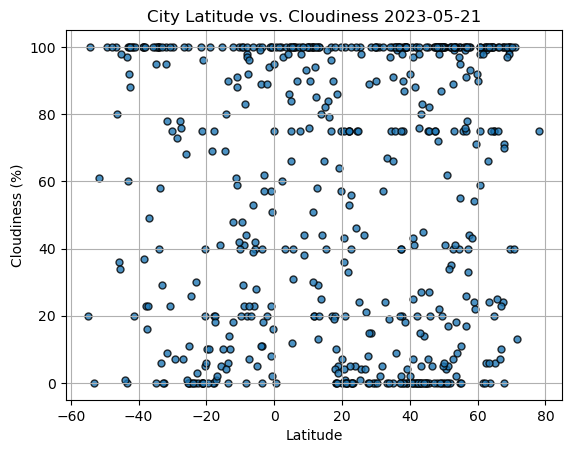

In [40]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud_scatter = city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", edgecolor="black", s=25, alpha =0.8)

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

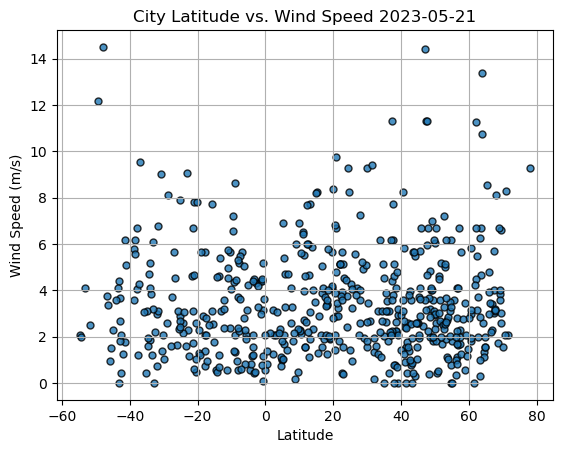

In [41]:
# Build the scatter plots for latitude vs. wind speed
lat_cloud_scatter = city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", edgecolor="black", s=25, alpha =0.8)

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots


def line_regress(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is: {rvalue}")



In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,28.18,75,75,5.14,US,1684718280
1,shubarshi,48.5872,57.1869,13.69,52,22,4.84,KZ,1684718280
3,lemvig,56.5486,8.3102,14.00,79,100,4.12,DK,1684718281
5,sambalpur,21.4500,83.9667,29.48,52,0,3.24,IN,1684718281
6,hawaiian paradise park,19.5933,-154.9731,27.07,81,75,5.66,US,1684718281


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,0.81,75,20,2.06,AR,1684718281
4,port mathurin,-19.6833,63.4167,24.59,74,10,1.28,MU,1684718281
7,port-aux-francais,-49.3500,70.2167,6.57,90,100,12.18,TF,1684718282
13,invercargill,-46.4000,168.3500,10.83,79,80,3.36,NZ,1684718051
15,punta arenas,-53.1500,-70.9167,0.06,86,0,4.12,CL,1684718284


###  Temperature vs. Latitude Linear Regression Plot

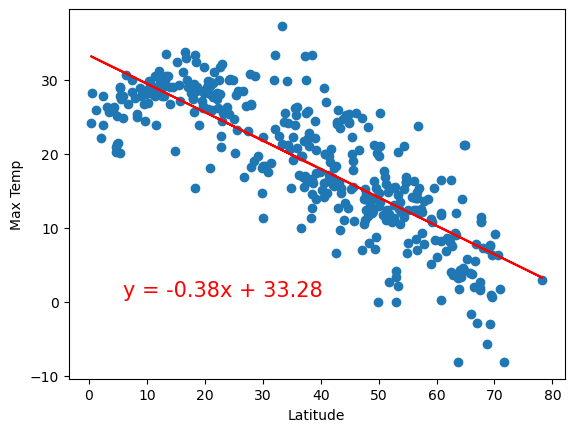

The r-value is: -0.8162698425697109


In [88]:
# Linear regression on Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")
   


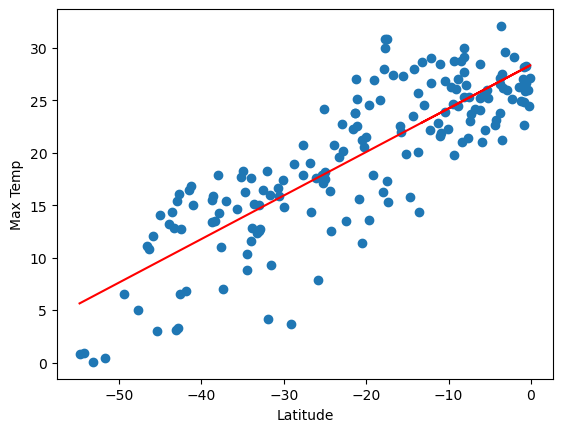

The r-value is: 0.8310913031559283


In [87]:
# Linear regression on Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")
   

**Discussion about the linear relationship:** 
The plots above display how the max temperature of given cities are affected and by their position in relation to the equator. The northern hemisphere plot shows a very strong relationship between the temperature decreasing the farther away from the equator (latitude of 0), the opposite is true with the Southern hemisphere plot. The closer the position of the city the warmer the temperature. The respective r-values of 0.81 and -0.83 prove these strong relationships. Given this modeling, one could make fairly accurate predictions to the temperature of a city if you knew its latitude or vice versa, knowing the max temperature and predictiing its approximate latitude.


### Humidity vs. Latitude Linear Regression Plot

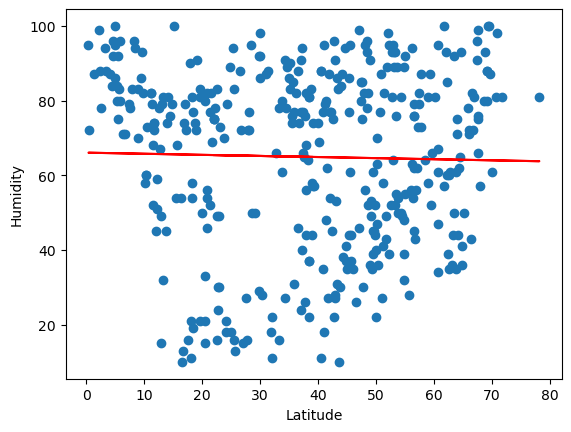

The r-value is: -0.023621029915222247


In [89]:
# Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

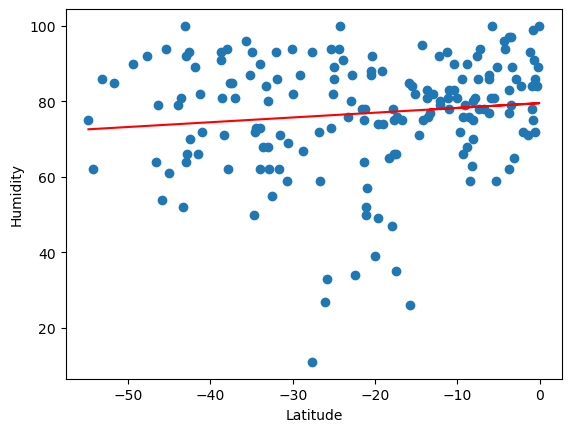

The r-value is: 0.11918227181000136


In [90]:
# Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** 
Given the data modeled in the two plots above, the conclusion I would come to is that the relationship between position in regards to the equator and humidity is very small. The small angles of the regression lines and corresponding r-values prove this both visually and statistically. Although it is important to note a few points when analyzing these plots. There is scientically proven relationship between average temperature and humidity e.g: tropical areas, rainforests etc. are humid climates and found closer to the equator. As well the fact that the cities used in this data are randomly generated. Different combinations of cities could produce different modeling and subsequent correlation values.

### Cloudiness vs. Latitude Linear Regression Plot

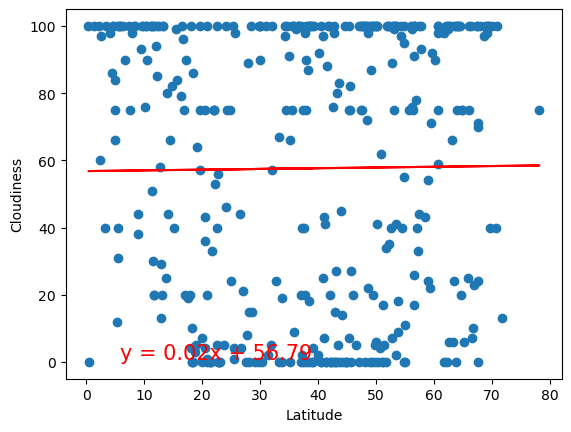

The r-value is: 0.010065908973886456


In [92]:
# Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

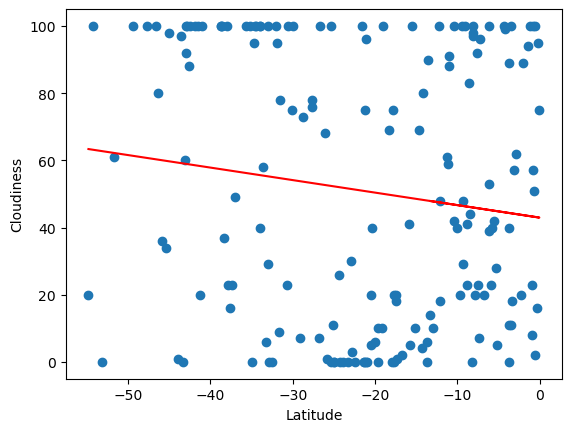

The r-value is: -0.13676333145615246


In [93]:
# Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

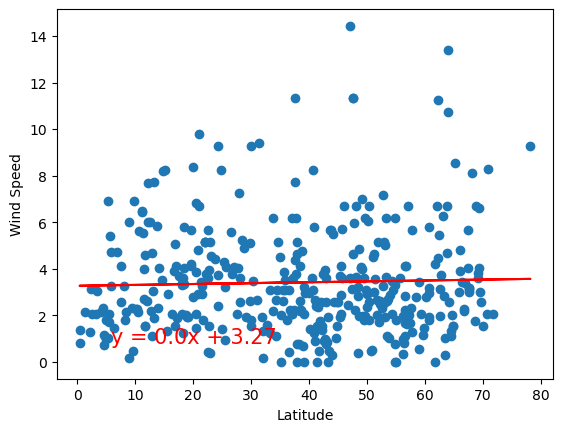

The r-value is: 0.03132332845424687


In [94]:
# Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

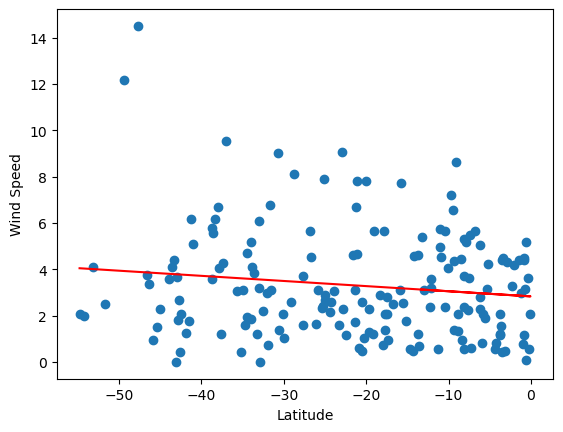

The r-value is: -0.1372895893144128


In [95]:
# Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE